In [1]:
import numpy as np
import imutils
from imutils import face_utils
import dlib
import cv2

In [37]:
predictor_path = './shape_predictor_68_face_landmarks.dat'
#predictor_path = './mouth_predictor.dat'

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

In [38]:
image = cv2.imread('./lfpw/testset/image_0123.png')

def prepare_image(img):
    return img
    img = imutils.resize(image, width=500)
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = prepare_image(image)
face_rects = detector(gray, 1)

In [39]:
import time
def show_features(img, rect):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    start = time.time()
    shape = predictor(img, rect)
    end = time.time()
    print(end - start)
    shape = face_utils.shape_to_np(shape)
    
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    #cv2.rectangle(img, (x, y), (x+w, y+2), (0, 255, 0), 2)
    
    for (x, y) in shape:
        cv2.circle(img, (x, y), 3, (0, 0, 255), -1)
    return img

In [40]:
img = show_features(gray, face_rects[0])

0.0020368099212646484


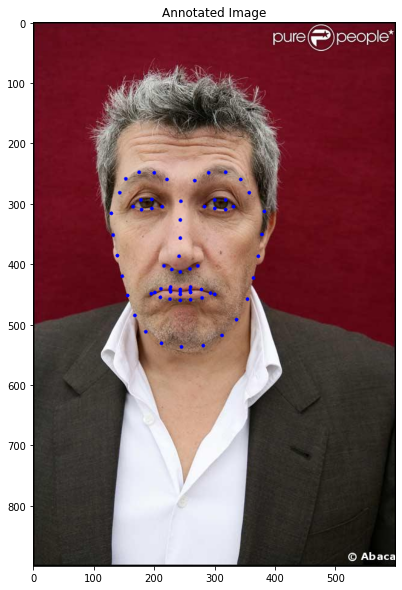

In [41]:
from matplotlib import pyplot as plt
cv2.cvtColor
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(img)
plt.title('Annotated Image')
plt.show()